# Project 4
## Given weather, location, testing, and spraying data, this competition asks you to predict when and where different species of mosquitos will test positive for West Nile virus. 

In [497]:
import pandas as pd
from DataFrame import reindex
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,auc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'DataFrame'

# EDA on Train dataset

In [181]:
train=pd.read_csv('./train.csv/train.csv')

In [ ]:
# merge train and test?? combine weather and spray (address, block, street, addressnumber andstreet, addressaccuracy, nummosquitos)

In [187]:
train #species

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [190]:
train[train['Street'].str.contains('N CANNON DR')]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
11,2007-05-29,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,2,0
12,2007-05-29,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,3,0
40,2007-06-05,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,3,0
159,2007-06-29,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,3,0
211,2007-07-02,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,2,0
212,2007-07-02,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,1,0
291,2007-07-11,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,1,0
292,2007-07-11,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,1,0
444,2007-07-18,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,3,0
445,2007-07-18,"2200 North Cannon Drive, Chicago, IL 60614, USA",CULEX RESTUANS,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,2,0


In [185]:
train.drop_duplicates() #drop duplicates

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [184]:
train[train.duplicated(keep=False)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
511,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
530,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0


In [ ]:
#groupby address and count of traps

In [140]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

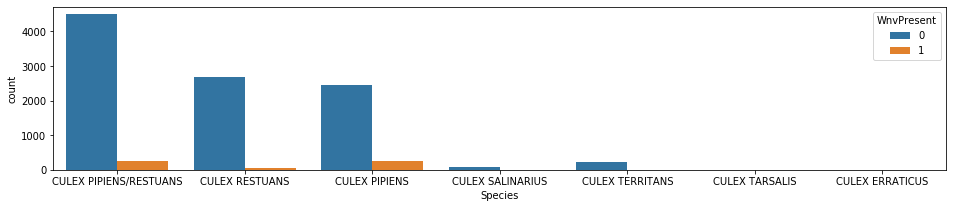

In [141]:
# Presence of whv virus in different species
plt.subplots(figsize=(16,3))
sns.countplot('Species',data=train,hue='WnvPresent',)

In [142]:
# Drop unnecessary information as we already have latitude and longtiude data
train.drop(columns=['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'],inplace=True)

In [143]:
# Convert Date day, month, year
train['year']=pd.to_datetime(train['Date']).dt.strftime('%Y')#.astype(int)
train['month']=pd.to_datetime(train['Date']).dt.strftime('%m')#.astype(int)
#train['day']=pd.to_datetime(train['Date']).dt.strftime('%d').astype(int)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d8eb8bad30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d8eb8bad30>)

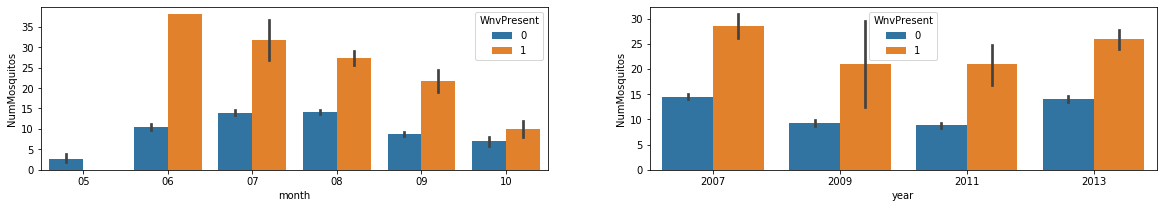

In [144]:
# Presence of whv virus over the years and months
plt.subplots(figsize=(20,3))
plt.subplot(1,2,1),sns.barplot('month','NumMosquitos',data=train,hue='WnvPresent')  
plt.subplot(1,2,2),sns.barplot('year','NumMosquitos',data=train,hue='WnvPresent')  

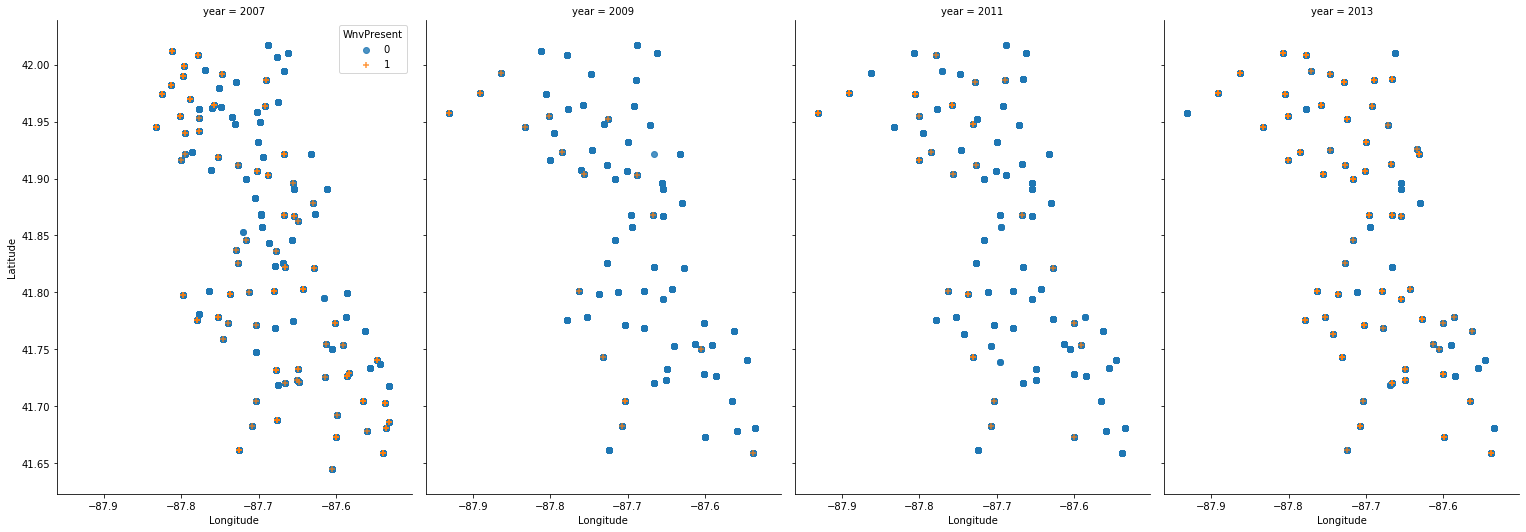

In [145]:
# Presence of whv virus over the years in different locations
location_year=sns.lmplot('Longitude','Latitude',data=train,hue='WnvPresent',col='year',fit_reg=False,markers=['o','+'],height=7.5,aspect=0.71,legend_out=False)
location_year.add_legend()

In [146]:
train_2007=train[train['year']=='2007']
train_2009=train[train['year']=='2009']
train_2011=train[train['year']=='2011']
train_2013=train[train['year']=='2013']

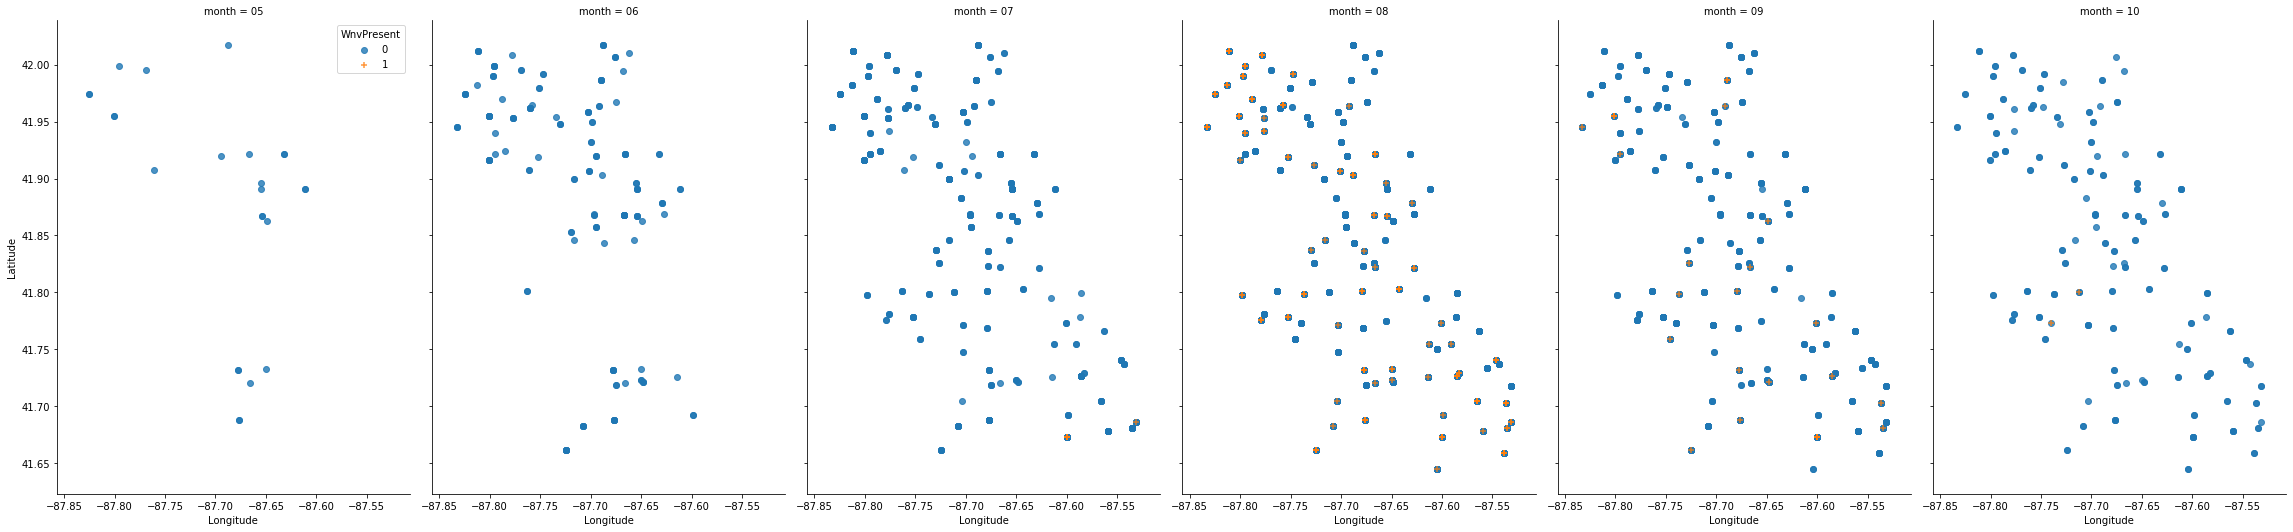

In [147]:
# Presence of whv virus over the years in different locations in 2007
location_month=sns.lmplot('Longitude','Latitude',data=train_2007,hue='WnvPresent',col='month',fit_reg=False,markers=['o','+'],height=7.5,aspect=0.71,legend_out=False)
location_month.add_legend()

In [148]:
# Create dummies for months
train=pd.get_dummies(train,columns=['month'],drop_first=True)

In [149]:
# Create dummies for years
#train=pd.get_dummies(train,columns=['year'],drop_first=True)

In [150]:
# Create dummies for species
train=pd.get_dummies(train,columns=['Species'],drop_first=True)

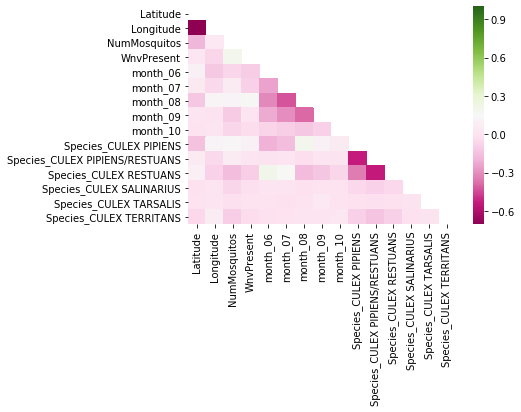

In [151]:
train_corr=train.corr()
mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
sns.heatmap(train_corr, cmap="PiYG",mask=mask)

# Clean weather data

In [617]:
weather=pd.read_csv('./weather.csv/weather.csv')
from statistics import median, mean
from math import ceil

In [618]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


## Drop the following columns from weather
1. Water1: All rows are missing data
2. CodeSum: Contains information on weather conditions which have been captured in other columns
3. SnowFall: Data are only available for station 1 and most of them are zeros (1459 out of 1472).

In [619]:
weather.drop(columns=['Water1','CodeSum','SnowFall'], inplace=True)

In [620]:
weather['Tavg']=(weather.Tmax+weather.Tmin)/2
weather['Tavg']=weather['Tavg'].apply(np.ceil).astype(int)

In [621]:

# Impute missing Tavg
weather_1['Tavg']=(weather_1.Tmax+weather.Tmin)/2
weather_1['Tavg']=weather_1['Tavg'].apply(np.ceil).astype(int)

# Impute missing Tavg
weather_2['Tavg']=(weather_2.Tmax+weather_2.Tmin)/2
weather_2['Tavg']=weather_2['Tavg'].apply(np.ceil).astype(int)

C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [622]:
#split weather data into stations 1 & 2
weather_1=weather.iloc[::2] # Station 1
weather_2=weather.iloc[1::2] # Station 2

In [623]:
weather_1.reset_index(drop=True);
weather_2.reset_index(drop=True);

In [624]:
# Create function to impute missing values 'M'
def impute_M(weather_subset, weather):
    weather_subset=weather_subset.replace('M',np.nan, inplace=True)
    weather=weather.replace('M',np.nan, inplace=True)
    weather_subset=weather_subset.astype(float)
    weather=weather.astype(float)
    weather.replace('NaN',mean(weather_subset), inplace=True)

In [625]:

#Impute missing WetBulb temp with mean values
impute_M(weather_1['WetBulb'], weather['WetBulb'])
impute_M(weather_2['WetBulb'], weather['WetBulb'])

AttributeError: 'NoneType' object has no attribute 'astype'

In [611]:
weather['WetBulb']=weather['WetBulb'].astype(float)
weather_1['WetBulb']=weather_1['WetBulb'].astype(float)
weather['WetBulb'].replace('NaN',mean(weather_1['WetBulb']), inplace=True)
type(weather['WetBulb'][0])

C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


numpy.float64

In [568]:
#Impute missing Station pressure with mean value
impute_M(weather_1['StnPressure'],weather['StnPressure'])
impute_M(weather_2['StnPressure'],weather['StnPressure'])

In [569]:
#Impute missing sealevel with mean value
impute_M(weather_1['SeaLevel'], weather['SeaLevel'])
impute_M(weather_2['SeaLevel'], weather['SeaLevel'])

In [626]:
# Impute missing AvgSpeed with mean value
impute_M(weather_1['AvgSpeed'], weather['AvgSpeed'])
impute_M(weather_2['AvgSpeed'], weather['AvgSpeed'])

AttributeError: 'NoneType' object has no attribute 'astype'

In [573]:
weather['PrecipTotal'].replace('  T',0.00, inplace=True)
weather['PrecipTotal'].replace('M',np.nan, inplace=True)
weather['PrecipTotal']=weather['PrecipTotal'].astype(float)
weather['PrecipTotal'].replace('NaN',mean(weather['PrecipTotal']), inplace=True)

In [518]:

#Impute missing and trace values for PreciTotal with mean values and 0.00 respectively
weather_1['PrecipTotal'].replace('M',np.nan, inplace=True)
weather_1['PrecipTotal'].replace('  T',0.00, inplace=True)
weather_1['PrecipTotal']=weather_1['PrecipTotal'].astype(float)
weather_1['PrecipTotal'].replace('NaN',mean(weather_1['PrecipTotal']), inplace=True)

weather_2['PrecipTotal'].replace('M',np.nan, inplace=True)
weather_2['PrecipTotal'].replace('  T',0.00, inplace=True)
weather_2['PrecipTotal']=weather_2['PrecipTotal'].astype(float)
weather_2['PrecipTotal'].replace('NaN',mean(weather_2['PrecipTotal']), inplace=True)

C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [574]:
weather['heat']=weather['Tavg'].apply(lambda x: 0 if x>64 else 65-x)
weather.replace('Heat', 'heat', inplace=True)

In [519]:

# Impute missing value for Heat column
weather_1['heat']=weather_1['Tavg'].apply(lambda x: 0 if x>64 else 65-x)
weather_1.replace('Heat', 'heat', inplace=True)

weather_2['heat']=weather_2['Tavg'].apply(lambda x: 0 if x>64 else 65-x)
weather_2.replace('Heat', 'heat', inplace=True)

C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [575]:
weather['cool']=weather['Tavg'].apply(lambda x: 0 if x<65 else x-65)
weather.replace('Cool', 'cool', inplace=True)

In [520]:


# Impute missing value for Cool column
weather_1['cool']=weather_1['Tavg'].apply(lambda x: 0 if x<65 else x-65)
weather_1.replace('Cool', 'cool', inplace=True)

weather_2['cool']=weather_2['Tavg'].apply(lambda x: 0 if x<65 else x-65)
weather_2.replace('Cool', 'cool', inplace=True)

C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [521]:
weather_1['Depart']=weather_1['Depart'].astype(int)
weather_2.drop(columns='Depart', inplace=True)

C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [522]:
weather_1['Depth']=weather_1['Depth'].astype(int)
weather_2.drop(columns='Depth', inplace=True)

C:\Users\frl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [588]:
weather['depth']=weather[weather.Station==1][['Depth']].astype(int)
weather['depth'].shape

(2944,)

In [590]:
sun=weather[weather.Station==1][['Date','Sunset','Sunrise']]
sun['time_diff']=sun.apply(lambda x: int(x.Sunset)-int(x.Sunrise),axis=1)
sun['sun_period']=sun.time_diff.map(lambda x:int(str(x)[:2])+int(str(x)[-2:])/60)

In [592]:
weather_final=weather.groupby('Date')['Tavg', 'Tmax', 'Tmin', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure', 
                                      'SeaLevel','ResultSpeed','ResultDir','AvgSpeed'].mean()

In [594]:
weather_final

,Tavg,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
Date,,,,,,
2007-05-01,67.5,83.5,51.0,51.0,2.20,26.0
2007-05-02,51.5,59.5,42.5,42.0,13.15,3.0
2007-05-03,57.0,66.5,47.0,40.0,12.30,6.5
2007-05-04,61.5,72.0,50.0,41.5,10.25,7.5
2007-05-05,60.0,66.0,53.5,38.5,11.45,7.0
2007-05-06,59.5,68.0,50.5,30.0,14.10,10.5
2007-05-07,66.0,83.5,48.5,40.0,8.55,17.5
2007-05-08,69.0,81.0,57.0,57.5,2.60,9.5
2007-05-09,69.5,76.5,62.0,59.5,3.90,8.0


In [593]:
weather_final=weather_final.join(sun, on='Date')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [587]:
weather.head().T

,0,1,2,3,4
Station,1,2,1,2,1
Date,2007-05-01,2007-05-01,2007-05-02,2007-05-02,2007-05-03
Tmax,83,84,59,60,66
Tmin,50,52,42,43,46
Tavg,67,68,51,52,56
Depart,14,M,-3,M,2
DewPoint,51,51,42,42,40
WetBulb,56,57,47,47,48
Heat,0,0,14,13,9
Cool,2,3,0,0,0


In [560]:
weather_1.shape

(1472, 20)

In [561]:
weather_2.shape

(1472, 18)

In [559]:
df = weather_1+weather_2
df

,AvgSpeed,Cool,Date,Depart,Depth,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SS,SeaLevel,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb,sun_period
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [550]:
Tmax = [weather_1['Tmax'],weather_2['Tmax']]
df['Tmax'] = df[Tmax].mean(axis=1)

KeyError: "None of [Index([(83, 59, 66, 66, 66, 68, 83, 82, 77, 84, 70, 64, 69, 90, 80, 66, 62, 71, 80, 69, 80, 87, 89, 88, 70, 65, 75, 79, 88, 87, 78, 85, 81, 78, 71, 64, 71, 91, 81, 79, 81, 86, 83, 87, 89, 91, 93, 91, 89, 80, 84, 77, 76, 67, 77, 89, 92, 91, 74, 70, 79, 75, 79, 83, 86, 89, 86, 90, 94, 94, 89, 77, 80, 78, 84, 82, 82, 83, 85, 83, 75, 74, 81, 83, 82, 85, 83, 83, 80, 85, 89, 91, 92, 91, 90, 81, 88, 88, 91, 87, ...), (84, 60, 67, 78, 66, 68, 84, 80, 76, 83, 73, 65, 69, 90, 82, 64, 61, 70, 80, 69, 79, 87, 89, 88, 66, 70, 75, 76, 88, 89, 80, 86, 81, 77, 72, 63, 73, 92, 81, 79, 81, 85, 82, 86, 89, 89, 92, 91, 89, 81, 85, 80, 75, 68, 75, 86, 91, 89, 73, 71, 77, 76, 77, 83, 84, 88, 84, 88, 93, 93, 89, 77, 80, 74, 85, 80, 82, 83, 85, 82, 74, 75, 81, 82, 82, 83, 84, 83, 80, 85, 86, 89, 91, 91, 88, 81, 88, 85, 92, 87, ...)], dtype='object')] are in the [columns]"

In [325]:
#Impute missing WetBulb temp with mean value
weather['WetBulb'].replace('M',np.nan, inplace=True)
weather['WetBulb']=weather['WetBulb'].astype(float)
weather['WetBulb'].replace('NaN',mean(weather['WetBulb']), inplace=True)

In [350]:
#Impute missing Station pressure with mean value
weather['StnPressure'].replace('M',np.nan, inplace=True)
weather['StnPressure']=weather['StnPressure'].astype(float)
weather['StnPressure'].replace('NaN',mean(weather['StnPressure']), inplace=True)

In [351]:
#Impute missing sealevel with mean value
weather['SeaLevel'].replace('M',np.nan, inplace=True)
weather['SeaLevel']=weather['SeaLevel'].astype(float)
weather['SeaLevel'].replace('NaN',mean(weather['SeaLevel']), inplace=True)

In [238]:
# Impute missing AvgSpeed with mean value
weather['AvgSpeed'].replace('M',np.nan, inplace=True)
weather['AvgSpeed']=weather['AvgSpeed'].astype(float)
weather['AvgSpeed'].replace('NaN',mean(weather['AvgSpeed']), inplace=True)

In [381]:
weather_2[weather_2['AvgSpeed']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,M,53,62,0,12,-,-,M,0.00,NaN,NaN,7.0,5,M
1745,2,2011-09-14,60,48,54,M,45,51,11,0,-,-,M,T,29.47,NaN,6.0,32,M
2067,2,2012-08-22,84,72,78,M,51,61,M,M,-,-,M,0.00,29.39,NaN,4.7,19,M


In [342]:
weather[weather['PrecipTotal']=='T']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,Depth,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,heat,cool


In [305]:
weather.head().T

,0,1,2,3,4
Station,1,2,1,2,1
Date,2007-05-01,2007-05-01,2007-05-02,2007-05-02,2007-05-03
Tmax,83,84,59,60,66
Tmin,50,52,42,43,46
Tavg,67,68,51,52,56
Depart,14,M,-3,M,2
DewPoint,51,51,42,42,40
WetBulb,56,57,47,47,48
Heat,0,0,14,13,9
Cool,2,3,0,0,0


In [156]:
# Convert temperature cols to celsius
weather['Tavg']=((weather['Tavg'] - 32) * 5.0)/9.0
weather['DewPoint']=((weather['DewPoint'] - 32) * 5.0)/9.0
weather['Tmin']=((weather['Tmin'] - 32) * 5.0)/9.0
weather['Tmax']=((weather['Tmax'] - 32) * 5.0)/9.0

In [269]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [157]:
# Add rain boolean
def filter_codesum(x):
    for code in rain:
        if code in x:
            return 1
        else:
            return 0

In [158]:
rain = ['RA', 'DZ', 'SH', 'TS', 'GR']

In [159]:
weather['rain'] = weather.CodeSum.apply(filter_codesum)

In [160]:
# Add feature 'relative humidity'
weather['relative_humidity'] = 100 * (np.exp((17.625*243.04*(weather.DewPoint-weather.Tavg))/((243.04+weather.Tavg)*(243.04+weather.DewPoint))))

In [161]:
# Average values between two stations
weather=weather.groupby('Date')['Tavg','Tmax', 'Tmin', 'rain','DewPoint','relative_humidity','AvgSpeed'].mean()

In [162]:
weather.head()

,Tavg,Tmax,Tmin,rain,DewPoint,relative_humidity,AvgSpeed
Date,,,,,,,
2007-05-01,19.583333,28.611111,10.555556,0.0,-11.913580,10.835081,9.40
2007-05-02,10.555556,15.277778,5.833333,0.0,-14.691358,15.452940,13.40
2007-05-03,13.750000,19.166667,8.333333,0.0,-15.308642,11.906008,12.55
2007-05-04,16.111111,22.222222,10.000000,0.5,-14.845679,10.696529,10.60
2007-05-05,15.416667,18.888889,11.944444,0.0,-15.771605,10.285653,11.75


In [240]:
weather[weather['depth']=='M'] # depth, 
# drop SnowFall 

KeyError: 'depth'

In [228]:
weather[weather['DewPoint']=='T'].count() #use station 1 #drop codesum # sunrise & sunset (daylight hours duration)

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [229]:
weather[weather['WetBulb']=='M']# replace missing values with other station figure
#use station 1. #mean

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77,M,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [231]:
weather[weather['Cool']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,NaN
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [230]:
weather[weather['Heat']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,NaN
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [221]:
weather[weather['Depart']=='M'].count() #use station 1

Station        1472
Date           1472
Tmax           1472
Tmin           1472
Tavg           1472
Depart         1472
DewPoint       1472
WetBulb        1472
Heat           1472
Cool           1472
Sunrise        1472
Sunset         1472
CodeSum        1472
Depth          1472
Water1         1472
SnowFall       1472
PrecipTotal    1472
StnPressure    1472
SeaLevel       1472
ResultSpeed    1472
ResultDir      1472
AvgSpeed       1469
dtype: int64

In [218]:
weather[weather['Sunset']=='M'].count()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [217]:
weather[weather['Depth']=='M'].count()

Station        1472
Date           1472
Tmax           1472
Tmin           1472
Tavg           1472
Depart         1472
DewPoint       1472
WetBulb        1472
Heat           1472
Cool           1472
Sunrise        1472
Sunset         1472
CodeSum        1472
Depth          1472
Water1         1472
SnowFall       1472
PrecipTotal    1472
StnPressure    1472
SeaLevel       1472
ResultSpeed    1472
ResultDir      1472
AvgSpeed       1472
dtype: int64

In [216]:
weather[weather['Water1']=='M'].count() #remove

Station        2944
Date           2944
Tmax           2944
Tmin           2944
Tavg           2944
Depart         2944
DewPoint       2944
WetBulb        2944
Heat           2944
Cool           2944
Sunrise        2944
Sunset         2944
CodeSum        2944
Depth          2944
Water1         2944
SnowFall       2944
PrecipTotal    2944
StnPressure    2944
SeaLevel       2944
ResultSpeed    2944
ResultDir      2944
AvgSpeed       2944
dtype: int64

In [215]:
weather[weather['SnowFall']=='M'].count()

Station        1472
Date           1472
Tmax           1472
Tmin           1472
Tavg           1472
Depart         1472
DewPoint       1472
WetBulb        1472
Heat           1472
Cool           1472
Sunrise        1472
Sunset         1472
CodeSum        1472
Depth          1472
Water1         1472
SnowFall       1472
PrecipTotal    1472
StnPressure    1472
SeaLevel       1472
ResultSpeed    1472
ResultDir      1472
AvgSpeed       1472
dtype: int64

In [241]:
weather[weather['PrecipTotal']=='M'].count() # change to zero. Impute T as 0.00

Station        2
Date           2
Tmax           2
Tmin           2
Tavg           2
Depart         2
DewPoint       2
WetBulb        2
Heat           2
Cool           2
Sunrise        2
Sunset         2
CodeSum        2
Depth          2
Water1         2
SnowFall       2
PrecipTotal    2
StnPressure    2
SeaLevel       2
ResultSpeed    2
ResultDir      2
AvgSpeed       2
dtype: int64

In [244]:
weather[weather['StnPressure']=='M']
# mean of station

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,M,53,62,0,12,...,,M,M,M,0.00,M,M,7.0,5,NaN
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75,M,55,63,0,10,...,,M,M,M,0.00,M,30.07,6.0,6,7.4


In [245]:
weather[weather['SeaLevel']=='M'] #mean of stations

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,M,53,62,0,12,...,,M,M,M,0.00,M,M,7.0,5,NaN
832,1,2009-06-18,80,61,71,1,63,67,0,6,...,RA BR,0,M,0.0,0.12,29.08,M,6.7,16,7.9
994,1,2009-09-07,77,59,68,1,59,62,0,3,...,BR,0,M,0.0,0.00,29.39,M,5.8,3,4.0
1732,1,2011-09-08,75,57,66,0,53,59,0,1,...,RA,0,M,0.0,T,29.34,M,13.0,2,13.4
1745,2,2011-09-14,60,48,54,M,45,51,11,0,...,RA BR HZ FU,M,M,M,T,29.47,M,6.0,32,NaN
1756,1,2011-09-20,74,49,62,0,54,58,3,0,...,MIFG BCFG BR,0,M,0.0,0.00,29.26,M,7.3,18,7.3
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,NaN
2090,1,2012-09-03,88,71,80,12,70,73,0,15,...,BR,0,M,0.0,0.00,29.17,M,4.6,6,4.4
2743,2,2014-07-23,76,64,70,M,56,61,0,5,...,,M,M,M,0.00,29.47,M,16.4,2,16.7


In [205]:
weather[weather['StnPressure']=='M'] #mean of 

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,M,53,62,0,12,...,,M,M,M,0.00,M,M,7.0,5,M
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75,M,55,63,0,10,...,,M,M,M,0.00,M,30.07,6.0,6,7.4


In [204]:
weather[weather['SeaLevel']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,M,53,62,0,12,...,,M,M,M,0.00,M,M,7.0,5,M
832,1,2009-06-18,80,61,71,1,63,67,0,6,...,RA BR,0,M,0.0,0.12,29.08,M,6.7,16,7.9
994,1,2009-09-07,77,59,68,1,59,62,0,3,...,BR,0,M,0.0,0.00,29.39,M,5.8,3,4.0
1732,1,2011-09-08,75,57,66,0,53,59,0,1,...,RA,0,M,0.0,T,29.34,M,13.0,2,13.4
1745,2,2011-09-14,60,48,54,M,45,51,11,0,...,RA BR HZ FU,M,M,M,T,29.47,M,6.0,32,M
1756,1,2011-09-20,74,49,62,0,54,58,3,0,...,MIFG BCFG BR,0,M,0.0,0.00,29.26,M,7.3,18,7.3
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
2090,1,2012-09-03,88,71,80,12,70,73,0,15,...,BR,0,M,0.0,0.00,29.17,M,4.6,6,4.4
2743,2,2014-07-23,76,64,70,M,56,61,0,5,...,,M,M,M,0.00,29.47,M,16.4,2,16.7


# Joining Train and weather data

In [628]:
df=train.join(weather, on='Date')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [627]:
df

,AvgSpeed,Cool,Date,Depart,Depth,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SS,SeaLevel,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb,sun_period
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


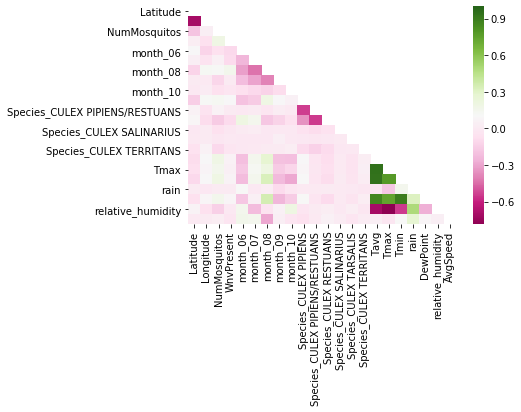

In [164]:
# Correlation analysis with weather data
df_corr=df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
sns.heatmap(df_corr, cmap="PiYG",mask=mask)

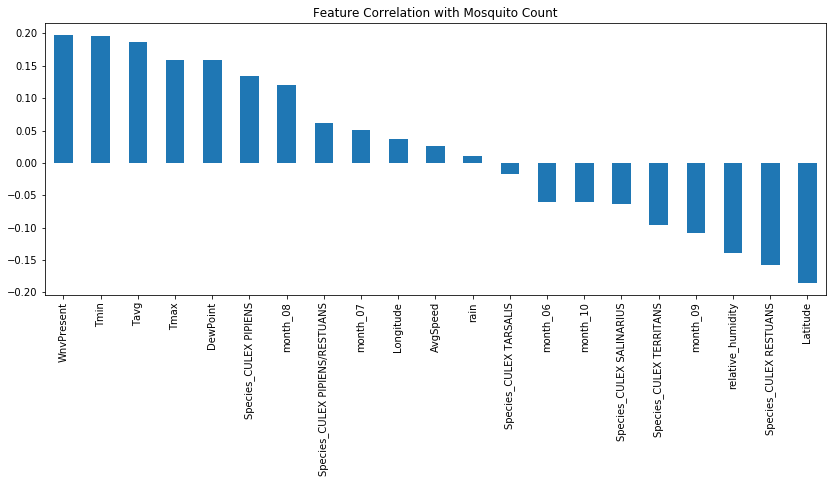

In [165]:
# Feature Correlation with Mosquito Count
fig = plt.figure(figsize=(14,5))
df.corr()['NumMosquitos'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.title("Feature Correlation with Mosquito Count")
plt.xticks(size = 10);

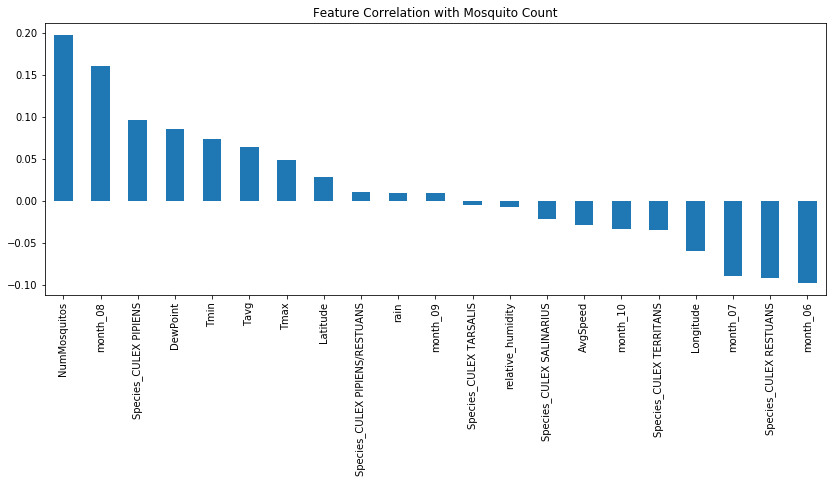

In [166]:
# Feature Correlation with Mosquito Count
fig = plt.figure(figsize=(14,5))
df.corr()['WnvPresent'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.title("Feature Correlation with Mosquito Count")
plt.xticks(size = 10);

# Spray data

## Compare the avg number of mos and whv in different years and check if 2011 and 2013 had fewer cases

In [246]:
spray=pd.read_csv('./spray.csv/spray.csv')
spray

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [168]:
spray.drop_duplicates('Date',inplace=True)

In [169]:
spray

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
95,2011-09-07,7:52:52 PM,41.981433,-87.787777
2209,2013-07-17,7:45:45 PM,41.997728,-87.767532
4411,2013-07-25,8:51:16 PM,41.960520,-87.739783
6018,2013-08-08,8:22:35 PM,41.919128,-87.696737
7213,2013-08-15,8:18:38 PM,41.944718,-87.808187
9881,2013-08-16,12:00:28 AM,41.960033,-87.785495
10022,2013-08-22,8:02:55 PM,41.885083,-87.719797
11609,2013-08-29,8:25:47 PM,41.785637,-87.713003
13911,2013-09-05,7:27:13 PM,41.997975,-87.790912


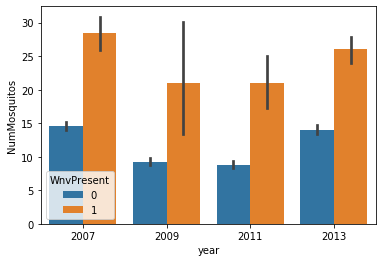

In [170]:
sns.barplot('year','NumMosquitos',data=df,hue='WnvPresent')

The average number of mosquitos and whv cases did not reduce significantly in 2011 and 2013.

# Preprocessing

In [108]:
X=df.drop('NumMosquitos', axis=1)
y=df['NumMosquitos']

In [171]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [173]:
# Standard Scalar
ss=StandardScaler()
X_train_ss = pd.DataFrame(ss.fit_transform(X_train))
X_test_ss = pd.DataFrame(ss.transform(X_test))

ValueError: could not convert string to float: '2007-08-16'

In [104]:
test=pd.read_csv('./test.csv/test.csv')
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [ ]:
mapdata=np.loadtxt('./mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt')
#traps = train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

In [ ]:
test=pd.read_csv('./test.csv/test.csv')

In [ ]:
test

In [ ]:
spray=pd.read_csv('./spray.csv/spray.csv')

In [ ]:
spray.head()

In [ ]:
train.shape

In [ ]:
weather=pd.read_csv('./weather.csv/weather.csv')

In [ ]:
weather.T

In [ ]:
weather.isnull().sum()

In [ ]:
spray